In [10]:
from logicqubit.logic import *
from cmath import *
import numpy as np
import sympy as sp
from scipy.linalg import expm, sinm, cosm, logm, sqrtm

In [11]:
def qft(qr):
    for i in range(len(qr)):
        for j in range(i):
            qr[i].CU1(qr[j], pi/float(2**(i-j)))
        qr[i].H()
        
def iqft(qr):
    for i in range(len(qr)):
        for j in range(i):
            qr[i].CU1(qr[j], -pi/float(2**(i-j)))
        qr[i].H()
        
def swap(s1, s2):
    s2.CX(s1)
    s1.CX(s2)
    s2.CX(s1)

In [12]:
D = np.matrix('1.5707963267948966 0; 0 3.141592653589793')
P = np.matrix('1 0; 0 1')/sqrt(2)

A = np.matrix('3 1; 1 3')
#A = P*D*P.I
#A_ad = A.getH()
t0 = 2*pi

#U = np.matrix(expm(-1j*pi*A))
U_A_div2 = np.matrix(expm(1j*A*t0/2))
U_A_div4 = np.matrix(expm(1j*A*t0/4))
print(U_A_div2.tolist())

[[(1.0000000000000004+4.440892098500627e-16j), 0j], [0j, (1.0000000000000004+4.440892098500627e-16j)]]


In [13]:
b = np.array([1,0])
x = np.linalg.solve(A, b)
print(x)

[ 0.375 -0.125]


In [14]:
logicQuBit  = LogicQuBit(4)

a = Qubit()
c1 = Qubit()
c2 = Qubit()
b = Qubit()
r = 2

c1.H()
c2.H()

#b.X()
#b.H()

# phase estimation
b.CU(c2, U_A_div4.tolist())
b.CU(c1, U_A_div2.tolist())

# iqft
swap(c1,c2)
c2.H()
c2.CS(c1, True)
c1.H()
swap(c1,c2)

a.CRY(c1, pi/2**r)
a.CRY(c2, 2*pi/2**r)

swap(c1,c2)
# qft
c1.H()
c2.CS(c1)
c2.H()
swap(c1,c2)


# reverse phase estimation
b.CU(c1, U_A_div4.conj().T.tolist())
b.CU(c2, U_A_div2.conj().T.tolist())

c1.H()
c2.H()
c2.PrintState()
c2.getDictPsi()

<IPython.core.display.Math object>

{'0000': (0.5-2.7842613392665686e-17j),
 '0001': (0.4999999999999999-2.7668537838592144e-17j),
 '0010': (-2.23705968685014e-16+7.554599442488008e-17j),
 '0011': (-1.1185571585378691e-17+1.4649861050015117e-16j),
 '0100': (-2.4503807662796223e-16-4.7335537465165435e-17j),
 '0101': (-2.7755575615628914e-17+1.7699821591488393e-17j),
 '0110': (0.3535533905932736+2.78426133926657e-17j),
 '0111': (-0.35355339059327373-1.1409698074428693e-17j),
 '1000': (-1.8928761761890062e-17+2.7842613392665704e-17j),
 '1001': (9.813077866773592e-18-2.7842613392665717e-17j),
 '1010': (-1.2636372189240907e-16-3.107669770100199e-17j),
 '1011': (6.510420273541852e-17+3.1076697701002e-17j),
 '1100': (-1.5027461392961003e-16+3.7760034294587894e-18j),
 '1101': (-1.149673585146546e-17-1.5323324243891858e-16j),
 '1110': (0.3535533905932737-2.7842613392665674e-17j),
 '1111': (-0.3535533905932737-6.709492485976009e-17j)}

[0]


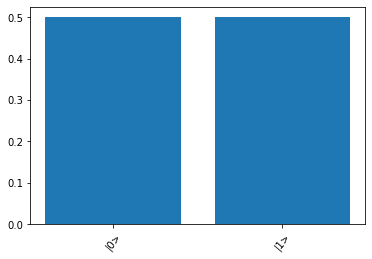

[(0.5+0j), (0.5+0j)]


In [15]:
res_a = logicQuBit.Measure_One(a)
print(res_a)
res = logicQuBit.Measure([b])
logicQuBit.Plot()
print(res)

In [16]:
def Text2List(table):
    list = [int(i, base=2) for i in table]
    size = len(table[0])
    tmp = sorted(list, key=int, reverse=False)  # values in ascending order
    result = [[int(bin(j)[2:].zfill(size)[i]) for i in range(size)] for j in tmp]
    return result

def BinList(n):
    blist = []
    for i in iter(range(2 ** n)):
        b = bin(i)[2:].zfill(n)  # value in binary, ex: i=1, n=4 -> '0001'
        blist.append(b)
    return Text2List(blist)

#size=3
#blist = [value for i,value in enumerate(BinList(size)) if res[i]>0.1] 
#results = [sum([value/2**(i+1) for i,value in enumerate(j)]) for j in blist]
#print(results)

In [17]:
# todos possíveis valores
size = 2
blist = [[i >> bl & 0x1 for bl in range(size)][::-1] for i in range(2**size)]
results = [2*pi*sum([value/2**(i+1) for i,value in enumerate(j)]) for j in blist]
results

[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469]